# Understanding Business

The first step in the Data Science Life Cycle is to understand the business we are about to interperet the Data. The data itself does explain quite a bit about the business model:

* This is a small business with only nine employees.
* Employees are responsible for selling to specific regions which subset into specific territories.
* Order quantities are large and since suppliers are involved, either a specialty grocery and/or restaurant supplier.

# Data Mining

The data is provided via a SQLite database. After glancing through the tables in https://sqliteonline.com/, there are a few notes for reference:

* The tables CustomerCustomerDemo and CustomerDemographics have no information in htem. 
* While the ERD tables have all ID columns listed, they are not specifically labeled those items in the tables. Only "Id" is provided. This will mean renaming may be necessary for the purpose of joining tables(dataframes).
* Since basic SQL queries will not be efficient for the purposes of the project, we will convert the database into a pandas dataframe using sqlalchemy and pandas.

![alt text](Northwind_ERD.png "Northwind")

In [1]:
#importing sqlalchemy and creating engine and session for SQL DB

import sqlalchemy
from sqlalchemy import create_engine
from sqlalchemy.orm import Session,sessionmaker
engine=create_engine ('sqlite:///Northwind_small.sqlite', echo=True)
Session=sessionmaker(bind=engine)
session=Session()

In [2]:
# inspecting database for table names

from sqlalchemy import inspect
inspector = inspect(engine)
inspector.get_table_names()

2019-05-17 16:11:17,212 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2019-05-17 16:11:17,215 INFO sqlalchemy.engine.base.Engine ()
2019-05-17 16:11:17,218 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2019-05-17 16:11:17,220 INFO sqlalchemy.engine.base.Engine ()
2019-05-17 16:11:17,437 INFO sqlalchemy.engine.base.Engine SELECT name FROM sqlite_master WHERE type='table' ORDER BY name
2019-05-17 16:11:17,438 INFO sqlalchemy.engine.base.Engine ()


['Category',
 'Customer',
 'CustomerCustomerDemo',
 'CustomerDemographic',
 'Employee',
 'EmployeeTerritory',
 'Order',
 'OrderDetail',
 'Product',
 'Region',
 'Shipper',
 'Supplier',
 'Territory']

In [3]:
#converting SQL tables into classes for easy conversion to pandas dataframe

from sqlalchemy import MetaData
from sqlalchemy.ext.automap import automap_base
metadata=MetaData()
metadata.reflect(engine)
Base = automap_base(metadata=metadata)
Base.prepare()
category=Base.classes.Category
customer=Base.classes.Customer
employee=Base.classes.Employee
employeeterritory=Base.classes.EmployeeTerritory
order=Base.classes.Order
orderdetail=Base.classes.OrderDetail
product=Base.classes.Product
region=Base.classes.Region
shipper=Base.classes.Shipper
supplier=Base.classes.Supplier
territory=Base.classes.Territory

2019-05-17 16:11:17,845 INFO sqlalchemy.engine.base.Engine SELECT name FROM sqlite_master WHERE type='table' ORDER BY name
2019-05-17 16:11:17,847 INFO sqlalchemy.engine.base.Engine ()
2019-05-17 16:11:17,849 INFO sqlalchemy.engine.base.Engine PRAGMA table_info("Category")
2019-05-17 16:11:17,851 INFO sqlalchemy.engine.base.Engine ()
2019-05-17 16:11:17,855 INFO sqlalchemy.engine.base.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = 'Category' AND type = 'table'
2019-05-17 16:11:17,857 INFO sqlalchemy.engine.base.Engine ()
2019-05-17 16:11:17,861 INFO sqlalchemy.engine.base.Engine PRAGMA foreign_key_list("Category")
2019-05-17 16:11:17,863 INFO sqlalchemy.engine.base.Engine ()
2019-05-17 16:11:17,866 INFO sqlalchemy.engine.base.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = 'Category' AND type = 'table'
2019-05-17 16:11:17,868 INFO sqlalchemy.engine.base.Engin

2019-05-17 16:11:17,986 INFO sqlalchemy.engine.base.Engine PRAGMA foreign_key_list("EmployeeTerritory")
2019-05-17 16:11:17,987 INFO sqlalchemy.engine.base.Engine ()
2019-05-17 16:11:17,988 INFO sqlalchemy.engine.base.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = 'EmployeeTerritory' AND type = 'table'
2019-05-17 16:11:17,990 INFO sqlalchemy.engine.base.Engine ()
2019-05-17 16:11:17,991 INFO sqlalchemy.engine.base.Engine PRAGMA index_list("EmployeeTerritory")
2019-05-17 16:11:17,992 INFO sqlalchemy.engine.base.Engine ()
2019-05-17 16:11:17,993 INFO sqlalchemy.engine.base.Engine PRAGMA index_list("EmployeeTerritory")
2019-05-17 16:11:17,994 INFO sqlalchemy.engine.base.Engine ()
2019-05-17 16:11:17,995 INFO sqlalchemy.engine.base.Engine PRAGMA index_info("sqlite_autoindex_EmployeeTerritory_1")
2019-05-17 16:11:17,996 INFO sqlalchemy.engine.base.Engine ()
2019-05-17 16:11:17,997 INFO sqlalchemy.engine.base.Engine SELECT sql 

2019-05-17 16:11:18,095 INFO sqlalchemy.engine.base.Engine PRAGMA table_info("Supplier")
2019-05-17 16:11:18,095 INFO sqlalchemy.engine.base.Engine ()
2019-05-17 16:11:18,098 INFO sqlalchemy.engine.base.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = 'Supplier' AND type = 'table'
2019-05-17 16:11:18,099 INFO sqlalchemy.engine.base.Engine ()
2019-05-17 16:11:18,101 INFO sqlalchemy.engine.base.Engine PRAGMA foreign_key_list("Supplier")
2019-05-17 16:11:18,102 INFO sqlalchemy.engine.base.Engine ()
2019-05-17 16:11:18,103 INFO sqlalchemy.engine.base.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = 'Supplier' AND type = 'table'
2019-05-17 16:11:18,104 INFO sqlalchemy.engine.base.Engine ()
2019-05-17 16:11:18,106 INFO sqlalchemy.engine.base.Engine PRAGMA index_list("Supplier")
2019-05-17 16:11:18,107 INFO sqlalchemy.engine.base.Engine ()
2019-05-17 16:11:18,109 INFO 

In [4]:
# converting the SQL classes to pandas dataframes

import pandas as pd
category_df=pd.read_sql_query('SELECT * FROM [category]', engine)
customer_df=pd.read_sql_query('SELECT * FROM [customer]', engine)
employee_df=pd.read_sql_query('SELECT * FROM [employee]', engine)
employeeterritory_df=pd.read_sql_query('SELECT * FROM [employeeterritory]', engine)
order_df=pd.read_sql_query('SELECT * FROM [order]',engine)
orderdetail_df=pd.read_sql_query('SELECT * FROM [orderdetail]' ,engine)
product_df=pd.read_sql_query('SELECT * FROM [product]', engine)
region_df=pd.read_sql_query('SELECT * FROM [region]', engine)
shipper_df=pd.read_sql_query('SELECT * FROM [shipper]', engine)
supplier_df=pd.read_sql_query('SELECT * FROM [supplier]', engine)
territory_df=pd.read_sql_query('SELECT * FROM [territory]', engine)

2019-05-17 16:11:21,726 INFO sqlalchemy.engine.base.Engine SELECT * FROM [category]
2019-05-17 16:11:21,727 INFO sqlalchemy.engine.base.Engine ()
2019-05-17 16:11:21,738 INFO sqlalchemy.engine.base.Engine SELECT * FROM [customer]
2019-05-17 16:11:21,739 INFO sqlalchemy.engine.base.Engine ()
2019-05-17 16:11:21,745 INFO sqlalchemy.engine.base.Engine SELECT * FROM [employee]
2019-05-17 16:11:21,746 INFO sqlalchemy.engine.base.Engine ()
2019-05-17 16:11:21,753 INFO sqlalchemy.engine.base.Engine SELECT * FROM [employeeterritory]
2019-05-17 16:11:21,754 INFO sqlalchemy.engine.base.Engine ()
2019-05-17 16:11:21,759 INFO sqlalchemy.engine.base.Engine SELECT * FROM [order]
2019-05-17 16:11:21,762 INFO sqlalchemy.engine.base.Engine ()
2019-05-17 16:11:21,797 INFO sqlalchemy.engine.base.Engine SELECT * FROM [orderdetail]
2019-05-17 16:11:21,799 INFO sqlalchemy.engine.base.Engine ()
2019-05-17 16:11:21,842 INFO sqlalchemy.engine.base.Engine SELECT * FROM [product]
2019-05-17 16:11:21,843 INFO sql

**As each hypothesis will deal with different combinations of tables, the remainder of steps (Cleaning, Exploring, Engineering, Modeling and Visualization) will be done on each individual hypothesis.

# Hypotheses

## Question 1: Do discounts have a statistically significant effect on the number of products customers order? If so, at what level(s) of discount?

### Ho = Discounts do not have a significant effect on the number of products customers order.

### Ha = Discounts do have a significant positive effect on the number of products customers order.

First, let's take a look at the table and compress it to the data that we need.

In [5]:
orderdetail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2155 entries, 0 to 2154
Data columns (total 6 columns):
Id           2155 non-null object
OrderId      2155 non-null int64
ProductId    2155 non-null int64
UnitPrice    2155 non-null float64
Quantity     2155 non-null int64
Discount     2155 non-null float64
dtypes: float64(2), int64(3), object(1)
memory usage: 101.1+ KB


In [6]:
orderdetail_df.head()

,Id,OrderId,ProductId,UnitPrice,Quantity,Discount
0,10248/11,10248,11,14.0,12,0.0
1,10248/42,10248,42,9.8,10,0.0
2,10248/72,10248,72,34.8,5,0.0
3,10249/14,10249,14,18.6,9,0.0
4,10249/51,10249,51,42.4,40,0.0


In [7]:
hyp1 = orderdetail_df[['Quantity','Discount']]

In [8]:
hyp1 = hyp1.copy()

In [9]:
hyp1.head()

,Quantity,Discount
0,12,0.0
1,10,0.0
2,5,0.0
3,9,0.0
4,40,0.0


Now, lets take a look at the counts of each value to determine if any rows can be removed

In [10]:
hyp1.Quantity.value_counts()

20     252
30     194
10     181
15     169
40     113
12      92
6       87
25      80
50      75
35      71
5       67
24      58
60      58
4       55
2       52
21      50
8       50
18      47
3       46
14      36
16      35
9       30
28      29
70      28
7       23
36      21
42      19
1       17
80      16
45      14
100     10
55       9
120      8
65       8
49       7
48       5
32       5
44       4
90       4
13       3
77       3
110      3
56       3
84       2
11       2
27       2
33       2
39       2
130      2
63       1
66       1
22       1
52       1
54       1
91       1
Name: Quantity, dtype: int64

In [11]:
hyp1.Discount.value_counts()

0.00    1317
0.05     185
0.10     173
0.20     161
0.15     157
0.25     154
0.03       3
0.02       2
0.01       1
0.04       1
0.06       1
Name: Discount, dtype: int64

Some of these discount amounts have very little data to support any testing, so we will remove those values and associated rows.

In [12]:
print(hyp1.loc[hyp1['Discount'] == 0.06])
print(hyp1.loc[hyp1['Discount'] == 0.04])
print(hyp1.loc[hyp1['Discount'] == 0.03])
print(hyp1.loc[hyp1['Discount'] == 0.02])
print(hyp1.loc[hyp1['Discount'] == 0.01])

      Quantity  Discount
2149         2      0.06
      Quantity  Discount
2141         1      0.04
      Quantity  Discount
2139         1      0.03
2140         2      0.03
2150         2      0.03
      Quantity  Discount
2133         1      0.02
2146         3      0.02
      Quantity  Discount
2152         2      0.01


In [13]:
hyp1.drop(index=[2149,2141,2139,2140,2150,2133,2146,2152], inplace=True)

In [14]:
hyp1.Discount.value_counts()

0.00    1317
0.05     185
0.10     173
0.20     161
0.15     157
0.25     154
Name: Discount, dtype: int64

In [15]:
# importing packages need to perform basic statistical functions and visualizations

import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

Now that we have our packages, we will run a t-test to look at the mean differences between our control (no discount) and experiment (some discount).

In [16]:
experiment = hyp1[hyp1.Discount != 0.00]
experiment1 = experiment.Quantity

In [17]:
control = hyp1[hyp1.Discount == 0.00]
control1 = control.Quantity

In [18]:
experiment.head()

,Quantity,Discount
6,35,0.15
7,15,0.15
8,6,0.05
9,15,0.05
11,40,0.05


### Normality Test

Before we decide which method to perform, we will first run a normality test on both control and experiment datasets using Scipy's Shapiro test:

In [19]:
print(stats.shapiro(control1))
print(stats.shapiro(experiment1))

(0.8434571027755737, 3.803856556577728e-34)
(0.8673426508903503, 6.471277454941499e-26)


According to the normality tests, we can verify that the data is normal.

We will run a visual probability distributions graph to see if there are differences between the means and standard deviations.

C:\Users\perso\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


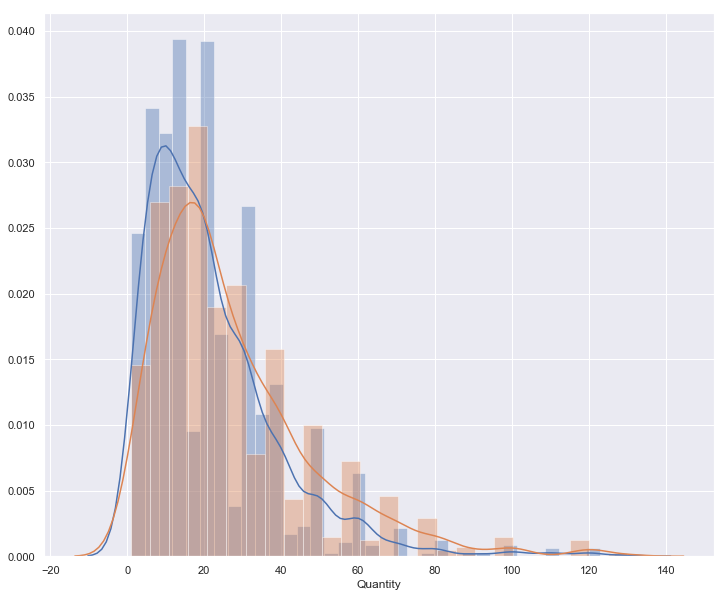

In [20]:
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(12,10)})
sns.distplot(control1) # Blue distribution
sns.distplot(experiment1) # Orange distribution

### Normality Test
Before we decide which method to perform, we will first run a normality test on both control and experiment datasets using Scipy's Shapiro test:

In [21]:
print(stats.shapiro(control1))
print(stats.shapiro(experiment1))

(0.8434571027755737, 3.803856556577728e-34)
(0.8673426508903503, 6.471277454941499e-26)


In [22]:
def create_sample(df,n):
    sample=[]
    while len(sample) < n:
        x = np.random.choice(df)
        sample.append(x)
    return sample
def create_sampling_distribution(df, dist_size=1000, n=500):
    sample_dist = []
    while len(sample_dist) < dist_size:
        sample = create_sample(df,n)
        sample_mean = sum(sample)/len(sample)
        sample_dist.append(sample_mean)
    return sample_dist

In [23]:
control_c = create_sampling_distribution(control1)
experiment_c = create_sampling_distribution(experiment1)

C:\Users\perso\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


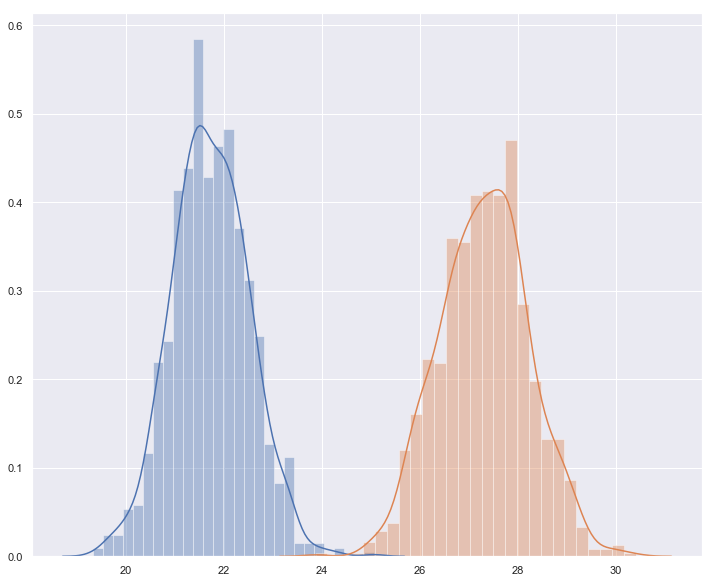

In [24]:
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(12,10)})
sns.distplot(control_c) # Blue distribution
sns.distplot(experiment_c) # Orange distribution

Now we will run a t-test on the normally distributed samples.

In [25]:
stats.ttest_ind(experiment_c, control_c)

Ttest_indResult(statistic=146.59936772192847, pvalue=0.0)

This high t-value shows a significant departure between the two samples and the p-value shows significance enough to reject the null hypothesis

#### The second part of the question asks which levels of discount are significant. We will start by taking a quick visual.

C:\Users\perso\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


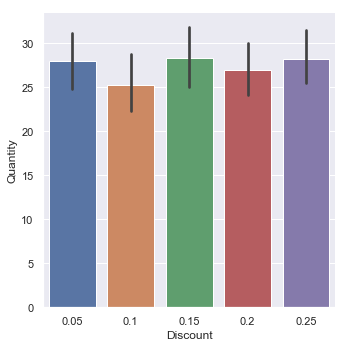

In [26]:
sns.catplot(x="Discount", y="Quantity", kind="bar", data=experiment);

From the visual, the 5%, 15% and 25% discount levels are the highest, but very close...further analysis is needed to gather a more accurate solution. We will import the packages needed to tun an ANOVA test on each discount level and its effect on quantity.

In [27]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

Now we will bin each discount so that we can run the ANOVA test at each discount level.

In [28]:
experiment.Discount = experiment.Discount.astype('category', inplace = True)

C:\Users\perso\Anaconda3\envs\learn-env\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [29]:
ANOVA = pd.get_dummies(experiment)

In [30]:
ANOVA.head()

,Quantity,Discount_0.05,Discount_0.1,Discount_0.15,Discount_0.2,Discount_0.25
6,35,0,0,1,0,0
7,15,0,0,1,0,0
8,6,1,0,0,0,0
9,15,1,0,0,0,0
11,40,1,0,0,0,0


Models cannot read columns with '.' in them. We will rename the columns so that we can run the function.

In [31]:
ANOVA = ANOVA.rename(columns={'Discount_0.05': 'D05', 'Discount_0.1': 'D1', 'Discount_0.15': 'D15', 'Discount_0.2': 'D2', 'Discount_0.25': 'D25'})

In [32]:
ANOVA.head()

,Quantity,D05,D1,D15,D2,D25
6,35,0,0,1,0,0
7,15,0,0,1,0,0
8,6,1,0,0,0,0
9,15,1,0,0,0,0
11,40,1,0,0,0,0


In [33]:
#running ANOVA test

formula = 'Quantity ~ D05 + D1 + D15 + D2 + D25'
lm = ols(formula, ANOVA).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

                 sum_sq     df          F    PR(>F)
D05         6072.618611    1.0  14.121639  0.000183
D1          1248.788690    1.0   2.904010  0.088736
D15         6090.999131    1.0  14.164382  0.000179
D2          3556.407829    1.0   8.270288  0.004134
D25         5691.836049    1.0  13.236144  0.000292
Residual  354768.342690  825.0        NaN       NaN


As you can see, the 15%, 5% and 25% discount levels impacted the quantity the most. This verifies the visual above. Also may be good to know as an additional insight that the 10% discount is not a significant discount. 

## Question 2: Did any discontinued products have a significant effect on order quantity to justify replacement?

### Ho = Discontinued products had no effect on order quantity.

### Ha = There are one or more discontinued products that had a positive effect on order quantity

While the same t-test and ANOVA test will be used, we will need to take an additional step with the data as it needs merged.

In [34]:
product_df.head()

,Id,ProductName,SupplierId,CategoryId,QuantityPerUnit,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued
0,1,Chai,1,1,10 boxes x 20 bags,18.00,39,0,10,0
1,2,Chang,1,1,24 - 12 oz bottles,19.00,17,40,25,0
2,3,Aniseed Syrup,1,2,12 - 550 ml bottles,10.00,13,70,25,0
3,4,Chef Anton's Cajun Seasoning,2,2,48 - 6 oz jars,22.00,53,0,0,0
4,5,Chef Anton's Gumbo Mix,2,2,36 boxes,21.35,0,0,0,1


In [35]:
orderdetail_df.head()

,Id,OrderId,ProductId,UnitPrice,Quantity,Discount
0,10248/11,10248,11,14.0,12,0.0
1,10248/42,10248,42,9.8,10,0.0
2,10248/72,10248,72,34.8,5,0.0
3,10249/14,10249,14,18.6,9,0.0
4,10249/51,10249,51,42.4,40,0.0


In [36]:
product_df = product_df.rename(columns={'Id': 'ProductId'})

In [37]:
hyp2 = orderdetail_df.merge(product_df, on = 'ProductId')

In [38]:
hyp2.head()

,Id,OrderId,ProductId,UnitPrice_x,Quantity,Discount,ProductName,SupplierId,CategoryId,QuantityPerUnit,UnitPrice_y,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued
0,10248/11,10248,11,14.0,12,0.0,Queso Cabrales,5,4,1 kg pkg.,21.0,22,30,30,0
1,10296/11,10296,11,16.8,12,0.0,Queso Cabrales,5,4,1 kg pkg.,21.0,22,30,30,0
2,10327/11,10327,11,16.8,50,0.2,Queso Cabrales,5,4,1 kg pkg.,21.0,22,30,30,0
3,10353/11,10353,11,16.8,12,0.2,Queso Cabrales,5,4,1 kg pkg.,21.0,22,30,30,0
4,10365/11,10365,11,16.8,24,0.0,Queso Cabrales,5,4,1 kg pkg.,21.0,22,30,30,0


In [39]:
hyp2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2155 entries, 0 to 2154
Data columns (total 15 columns):
Id                 2155 non-null object
OrderId            2155 non-null int64
ProductId          2155 non-null int64
UnitPrice_x        2155 non-null float64
Quantity           2155 non-null int64
Discount           2155 non-null float64
ProductName        2155 non-null object
SupplierId         2155 non-null int64
CategoryId         2155 non-null int64
QuantityPerUnit    2155 non-null object
UnitPrice_y        2155 non-null float64
UnitsInStock       2155 non-null int64
UnitsOnOrder       2155 non-null int64
ReorderLevel       2155 non-null int64
Discontinued       2155 non-null int64
dtypes: float64(3), int64(9), object(3)
memory usage: 269.4+ KB


Now that we have a good working dataframe, now we can repeat the t-test and ANOVA.

In [40]:
hyp2 = hyp2[['Quantity','Discontinued', 'ProductId']]

In [41]:
hyp2 = hyp2.copy()

In [42]:
control = hyp2[hyp2.Discontinued == 0]
control2 = control.ProductId

In [43]:
experiment = hyp2[hyp2.Discontinued == 1]
experiment2 = experiment.ProductId

C:\Users\perso\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


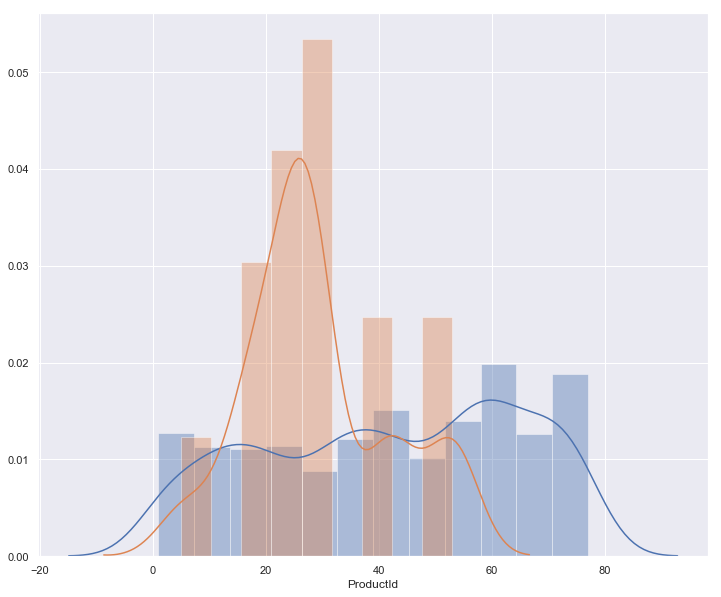

In [44]:
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(12,10)})
sns.distplot(control2) # Blue distribution
sns.distplot(experiment2) # Orange distribution

The visual shows that these are not normal distributions, we will confirm with the shapiro tests.

In [45]:
print(stats.shapiro(control2))
print(stats.shapiro(experiment2))

(0.9470006823539734, 8.755490149850235e-26)
(0.9039937257766724, 6.38216632320443e-11)


The Shapiro tests show that the distributions are not normal. We will run a Welch's t-test for non-normal distributions.

In [46]:
def welch_t(a, b):
    
    """ Calculate Welch's t statistic for two samples. """

    numerator = a.mean() - b.mean()
    
    # “ddof = Delta Degrees of Freedom”: the divisor used in the calculation is N - ddof, 
    #  where N represents the number of elements. By default ddof is zero.
    
    denominator = np.sqrt(a.var(ddof=1)/a.size + b.var(ddof=1)/b.size)
    
    return numerator/denominator

welch_t(control2,experiment2)

13.16321468104886

The low result shows that there isn't a significant difference in quantity ordered based on the discontinued products. To further validate, we will run an effect size (Cohen's D) on the discontinued products to the Qunatity.

In [47]:
def cohend(d1, d2):
	# calculate the size of samples
	n1, n2 = len(d1), len(d2)
	# calculate the variance of the samples
	s1, s2 = d1.var(ddof=1), d2.var(ddof=1)
	# calculate the pooled standard deviation
	s = np.sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))
	# calculate the means of the samples
	u1, u2 = np.mean(d1), np.mean(d2)
	# calculate the effect size
	return (u1 - u2) / s

cohend(experiment2, experiment.Quantity)

0.35328508790898755

This is a low effect size and vfurther validates the result. But we will run an ANOVA on each product to further validate.

In [48]:
experiment.ProductId = experiment.ProductId.astype('category', inplace = True)

C:\Users\perso\Anaconda3\envs\learn-env\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [49]:
ANOVA = pd.get_dummies(experiment)

In [50]:
ANOVA.head()

,Quantity,Discontinued,ProductId_5,ProductId_9,ProductId_17,ProductId_24,ProductId_28,ProductId_29,ProductId_42,ProductId_53
38,10,1,0,0,0,0,0,0,1,0
39,2,1,0,0,0,0,0,0,1,0
40,6,1,0,0,0,0,0,0,1,0
41,10,1,0,0,0,0,0,0,1,0
42,9,1,0,0,0,0,0,0,1,0


In [51]:
formula = 'Quantity ~ C(ProductId_5) + C(ProductId_9) + C(ProductId_17) + C(ProductId_24) + C(ProductId_28) + C(ProductId_29) + C(ProductId_42) + C(ProductId_53)'
lm = ols(formula, ANOVA).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

                       sum_sq     df         F    PR(>F)
C(ProductId_5)     966.099395    1.0  2.384855  0.123953
C(ProductId_9)      20.314939    1.0  0.050148  0.823013
C(ProductId_17)   1175.524868    1.0  2.901831  0.089891
C(ProductId_24)     73.766366    1.0  0.182095  0.669996
C(ProductId_28)     68.214499    1.0  0.168390  0.681946
C(ProductId_29)    207.446178    1.0  0.512089  0.474995
C(ProductId_42)    184.608674    1.0  0.455714  0.500343
C(ProductId_53)    333.465458    1.0  0.823173  0.365247
Residual         89121.491732  220.0       NaN       NaN


Verified. No significant impact from the discontinued products.

## Question 3: Is there a region that expansion should be focused?

### Ho = There is no significant difference between total sales between regions.

### Ha = There is a significant proportion of total sales in certain region(s).

In order to answer this hypothesis, we will need to feature engineer a 'total sales' based on quantity times unit price. We will also include any discounts applied to those orders.

In [52]:
orderdetail_df.head()

,Id,OrderId,ProductId,UnitPrice,Quantity,Discount
0,10248/11,10248,11,14.0,12,0.0
1,10248/42,10248,42,9.8,10,0.0
2,10248/72,10248,72,34.8,5,0.0
3,10249/14,10249,14,18.6,9,0.0
4,10249/51,10249,51,42.4,40,0.0


In [53]:
hyp3 = orderdetail_df.copy()

In [54]:
hyp3d = hyp3[hyp3.Discount == 0]

In [55]:
hyp3d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1317 entries, 0 to 2154
Data columns (total 6 columns):
Id           1317 non-null object
OrderId      1317 non-null int64
ProductId    1317 non-null int64
UnitPrice    1317 non-null float64
Quantity     1317 non-null int64
Discount     1317 non-null float64
dtypes: float64(2), int64(3), object(1)
memory usage: 72.0+ KB


In [56]:
hyp3nd = hyp3[hyp3.Discount != 0]

In [57]:
hyp3nd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 838 entries, 6 to 2152
Data columns (total 6 columns):
Id           838 non-null object
OrderId      838 non-null int64
ProductId    838 non-null int64
UnitPrice    838 non-null float64
Quantity     838 non-null int64
Discount     838 non-null float64
dtypes: float64(2), int64(3), object(1)
memory usage: 45.8+ KB


In [58]:
hyp3d['TotalSales'] = hyp3d['Quantity'] * hyp3d['UnitPrice']

C:\Users\perso\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [59]:
hyp3d.head()

,Id,OrderId,ProductId,UnitPrice,Quantity,Discount,TotalSales
0,10248/11,10248,11,14.0,12,0.0,168.0
1,10248/42,10248,42,9.8,10,0.0,98.0
2,10248/72,10248,72,34.8,5,0.0,174.0
3,10249/14,10249,14,18.6,9,0.0,167.4
4,10249/51,10249,51,42.4,40,0.0,1696.0


In [60]:
hyp3nd['TotalSales'] = hyp3nd['Quantity'] * hyp3nd['UnitPrice'] * hyp3nd['Discount']

C:\Users\perso\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [61]:
hyp3nd.head()

,Id,OrderId,ProductId,UnitPrice,Quantity,Discount,TotalSales
6,10250/51,10250,51,42.4,35,0.15,222.60
7,10250/65,10250,65,16.8,15,0.15,37.80
8,10251/22,10251,22,16.8,6,0.05,5.04
9,10251/57,10251,57,15.6,15,0.05,11.70
11,10252/20,10252,20,64.8,40,0.05,129.60


In [62]:
hyp3_=hyp3nd.merge(hyp3d, how = 'outer')

In [63]:
hyp3_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2155 entries, 0 to 2154
Data columns (total 7 columns):
Id            2155 non-null object
OrderId       2155 non-null int64
ProductId     2155 non-null int64
UnitPrice     2155 non-null float64
Quantity      2155 non-null int64
Discount      2155 non-null float64
TotalSales    2155 non-null float64
dtypes: float64(3), int64(3), object(1)
memory usage: 134.7+ KB


Now that we have a good dataset to work with, we need to merge along several tables in order to get to our variables.

In [64]:
order_df = order_df.rename(columns={'Id': 'OrderId'})

In [65]:
hyp3__=hyp3_.merge(order_df, how = 'left', on = 'OrderId')

In [66]:
hyp3__.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2155 entries, 0 to 2154
Data columns (total 20 columns):
Id                2155 non-null object
OrderId           2155 non-null int64
ProductId         2155 non-null int64
UnitPrice         2155 non-null float64
Quantity          2155 non-null int64
Discount          2155 non-null float64
TotalSales        2155 non-null float64
CustomerId        2155 non-null object
EmployeeId        2155 non-null int64
OrderDate         2155 non-null object
RequiredDate      2155 non-null object
ShippedDate       2082 non-null object
ShipVia           2155 non-null int64
Freight           2155 non-null float64
ShipName          2155 non-null object
ShipAddress       2155 non-null object
ShipCity          2155 non-null object
ShipRegion        2155 non-null object
ShipPostalCode    2100 non-null object
ShipCountry       2155 non-null object
dtypes: float64(4), int64(5), object(11)
memory usage: 353.6+ KB


In [67]:
employee_df = employee_df.rename(columns={'Id': 'EmployeeId'})

In [68]:
hyp3___=hyp3__.merge(employee_df, how = 'left', on = 'EmployeeId')

In [69]:
hyp3___.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2155 entries, 0 to 2154
Data columns (total 37 columns):
Id                 2155 non-null object
OrderId            2155 non-null int64
ProductId          2155 non-null int64
UnitPrice          2155 non-null float64
Quantity           2155 non-null int64
Discount           2155 non-null float64
TotalSales         2155 non-null float64
CustomerId         2155 non-null object
EmployeeId         2155 non-null int64
OrderDate          2155 non-null object
RequiredDate       2155 non-null object
ShippedDate        2082 non-null object
ShipVia            2155 non-null int64
Freight            2155 non-null float64
ShipName           2155 non-null object
ShipAddress        2155 non-null object
ShipCity           2155 non-null object
ShipRegion         2155 non-null object
ShipPostalCode     2100 non-null object
ShipCountry        2155 non-null object
LastName           2155 non-null object
FirstName          2155 non-null object
Title         

In [70]:
hyp3____=hyp3___.merge(employeeterritory_df, how = 'left', on = 'EmployeeId')

In [71]:
territory_df = territory_df.rename(columns={'Id': 'TerritoryId'})

In [72]:
hyp3_____=hyp3____.merge(territory_df, how = 'left', on = 'TerritoryId')

In [73]:
region_df = region_df.rename(columns={'Id': 'RegionId'})

In [74]:
hyp3______=hyp3_____.merge(region_df, how = 'left', on = 'RegionId')

In [75]:
hyp3f = hyp3______[['TotalSales', 'TerritoryId', 'RegionId']]
dataset3 = hyp3f.RegionId

In [76]:
def cohend(d1, d2):
	# calculate the size of samples
	n1, n2 = len(d1), len(d2)
	# calculate the variance of the samples
	s1, s2 = d1.var(ddof=1), d2.var(ddof=1)
	# calculate the pooled standard deviation
	s = np.sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))
	# calculate the means of the samples
	u1, u2 = np.mean(d1), np.mean(d2)
	# calculate the effect size
	return (u1 - u2) / s

cohend(hyp3f.TotalSales, dataset3)

0.7147821473040825

Based on Cohen's D, there is a greater than 70% contribution to total solaes from the Regions as a whole. Now we can visualize the data and run an ANOVA test to see the contribution of each individual region.

C:\Users\perso\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


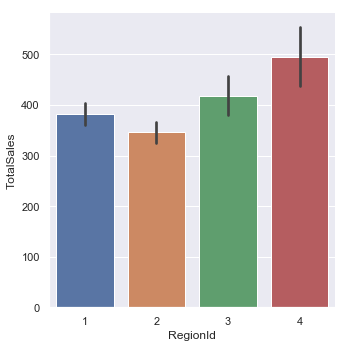

In [77]:
ymean=np.mean(hyp3f.TotalSales)
sns.catplot(x="RegionId", y="TotalSales", kind="bar", data=hyp3f);

In [78]:
hyp3f.RegionId = hyp3f.RegionId.astype('category', inplace = True)

C:\Users\perso\Anaconda3\envs\learn-env\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [79]:
ANOVA = pd.get_dummies(hyp3f)

In [80]:
ANOVA.head()

,TotalSales,TerritoryId_01581,TerritoryId_01730,TerritoryId_01833,TerritoryId_02116,TerritoryId_02139,TerritoryId_02184,TerritoryId_02903,TerritoryId_03049,TerritoryId_03801,...,TerritoryId_95008,TerritoryId_95054,TerritoryId_95060,TerritoryId_98004,TerritoryId_98052,TerritoryId_98104,RegionId_1,RegionId_2,RegionId_3,RegionId_4
0,222.6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,222.6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,222.6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,37.8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,37.8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [81]:
formula = 'TotalSales ~ C(RegionId_1) + C(RegionId_2) + C(RegionId_3) + C(RegionId_4)'
lm = ols(formula, ANOVA).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

                     sum_sq       df          F        PR(>F)
C(RegionId_1)  1.347240e+07      1.0  22.527085  2.100396e-06
C(RegionId_2)  1.048758e+06      1.0   1.753620  1.854522e-01
C(RegionId_3)  1.953955e+07      1.0  32.671921  1.121878e-08
C(RegionId_4)  5.110832e+07      1.0  85.457804  2.843719e-20
Residual       6.055290e+09  10125.0        NaN           NaN


Based on the ANOVA test, Regions 1,3 and 4 are all statistically significant for Total Sales, with Region 4 having the most impact. Focusing on expansion to that Region may be of benefit. An interesting insight is the underperformance of Region 2 and what needs to be done to turn it around.

## Question 4: Do any categories significantly underperform/outperform?

### Ho = All categories of products perform the same

### Ha = There are one or more categories of products that either underperform or outperform others.

Again, we will rename and merge in order to get our desired dataset.

In [82]:
hyp3_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2155 entries, 0 to 2154
Data columns (total 7 columns):
Id            2155 non-null object
OrderId       2155 non-null int64
ProductId     2155 non-null int64
UnitPrice     2155 non-null float64
Quantity      2155 non-null int64
Discount      2155 non-null float64
TotalSales    2155 non-null float64
dtypes: float64(3), int64(3), object(1)
memory usage: 134.7+ KB


In [83]:
product_df = product_df.rename(columns={'Id': 'ProductId'})

In [84]:
hyp4 = hyp3_.merge(product_df, on = 'ProductId')

In [85]:
hyp4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2155 entries, 0 to 2154
Data columns (total 16 columns):
Id                 2155 non-null object
OrderId            2155 non-null int64
ProductId          2155 non-null int64
UnitPrice_x        2155 non-null float64
Quantity           2155 non-null int64
Discount           2155 non-null float64
TotalSales         2155 non-null float64
ProductName        2155 non-null object
SupplierId         2155 non-null int64
CategoryId         2155 non-null int64
QuantityPerUnit    2155 non-null object
UnitPrice_y        2155 non-null float64
UnitsInStock       2155 non-null int64
UnitsOnOrder       2155 non-null int64
ReorderLevel       2155 non-null int64
Discontinued       2155 non-null int64
dtypes: float64(4), int64(9), object(3)
memory usage: 286.2+ KB


In [86]:
hyp4f = hyp4[['TotalSales', 'CategoryId']]
dataset4 = hyp4f.CategoryId

C:\Users\perso\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


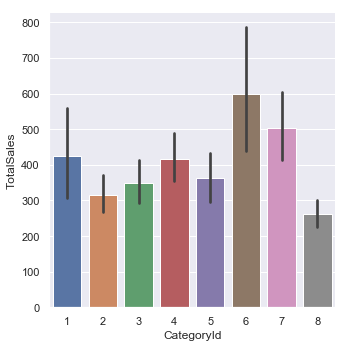

In [87]:
sns.catplot(x="CategoryId", y="TotalSales", kind="bar", data=hyp4f);

In [88]:
hyp4f.CategoryId = hyp4f.CategoryId.astype('category', inplace = True)

C:\Users\perso\Anaconda3\envs\learn-env\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [89]:
ANOVA = pd.get_dummies(hyp4f)

In [90]:
ANOVA.head()

,TotalSales,CategoryId_1,CategoryId_2,CategoryId_3,CategoryId_4,CategoryId_5,CategoryId_6,CategoryId_7,CategoryId_8
0,222.60,0,0,0,0,0,0,1,0
1,8.48,0,0,0,0,0,0,1,0
2,407.04,0,0,0,0,0,0,1,0
3,114.48,0,0,0,0,0,0,1,0
4,381.60,0,0,0,0,0,0,1,0


In [91]:
formula = 'TotalSales ~ C(CategoryId_1) + C(CategoryId_2) + C(CategoryId_3) + C(CategoryId_4) + C(CategoryId_5) + C(CategoryId_6) + C(CategoryId_7) + C(CategoryId_8)'
lm = ols(formula, ANOVA).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

                       sum_sq      df          F    PR(>F)
C(CategoryId_1)  1.827498e+06     1.0   2.923372  0.087450
C(CategoryId_2)  4.750322e+05     1.0   0.759889  0.383461
C(CategoryId_3)  3.391195e+04     1.0   0.054248  0.815853
C(CategoryId_4)  1.325149e+06     1.0   2.119784  0.145553
C(CategoryId_5)  2.174141e+03     1.0   0.003478  0.952979
C(CategoryId_6)  1.173186e+07     1.0  18.766958  0.000015
C(CategoryId_7)  3.373609e+06     1.0   5.396619  0.020269
C(CategoryId_8)  3.444355e+06     1.0   5.509788  0.019001
Residual         1.342162e+09  2147.0        NaN       NaN


While not all categories were statistically significant, Category 6 - Meat and Poultry, Category 7 - Produce, Category 8 - Seafood were with Cat. 6 being the most impactful towards total sales. An interseing insight is that Seafood was under the mean of Total Sales, it had a significant impact on total sales. More research into the performance of this category should be explored.